# Outliers

Outliers are data point that differ significantly from other observations. They can reveal some unknown patterns (machine failure, systems fraud...) or they can be errors due to specific circumstances. 

Besides, some Machine Learning Algorithmes are sensible to outliers. They can destroy the final predictions as they are adding bias to the data. 

Handling them is one of the most important steps of the Data Preparation life cycle.

There are 3 main types of outliers:

<ul class="ul_content">
 <li><b>Global Outliers</b> : Their values are far outside the entirety of the data set in which they are found</li>
 <li><b>Contextual Outliers</b> : Their values significantly deviates from the rest of the data points in the same context</li>
 <li><b>Collective Outliers</b> : Their values as a collection deviate significantly from the entire data set but they are not global or contextual outliers</li>
</ul>

The most critical ones are the Global Outliers as they are the ones responsible for adding a lot of bias to the data. We can found them easily by computing the Z-Score. Let's look at some examples using the 'Heart Disease' dataset where we have different information on patients who probably have complications.

In [1]:
from verticapy import *

The table "public"."heart" has been successfully created.


,123ageInt,123sexInt,123cpInt,123trtbpsInt,123cholInt,123fbsInt,123restecgInt,123thalachhInt,123exngInt,"123oldpeakNumeric(5,2)",123slpInt,123caaInt,123thallInt,123outputInt
1,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
2,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
3,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
4,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
5,35,1,0,120,198,0,1,130,1,1.6,1,0,3,0
6,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
7,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
8,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1
9,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
10,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1

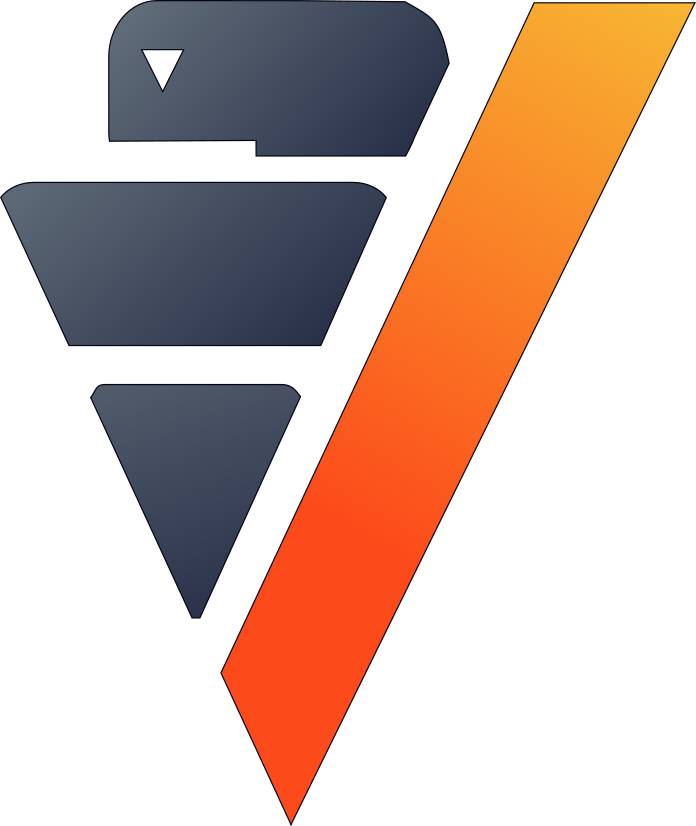

In [3]:
read_csv('heart.csv',
         schema = 'public',
         table_name = 'heart')

,123ageInt,123sexInt,123cpInt,123trtbpsInt,123cholInt,123fbsInt,123restecgInt,123thalachhInt,123exngInt,"123oldpeakNumeric(5,2)",123slpInt,123caaInt,123thallInt,123outputInt
1,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
2,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
3,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
4,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
5,35,1,0,120,198,0,1,130,1,1.6,1,0,3,0
6,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
7,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
8,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1
9,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
10,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1

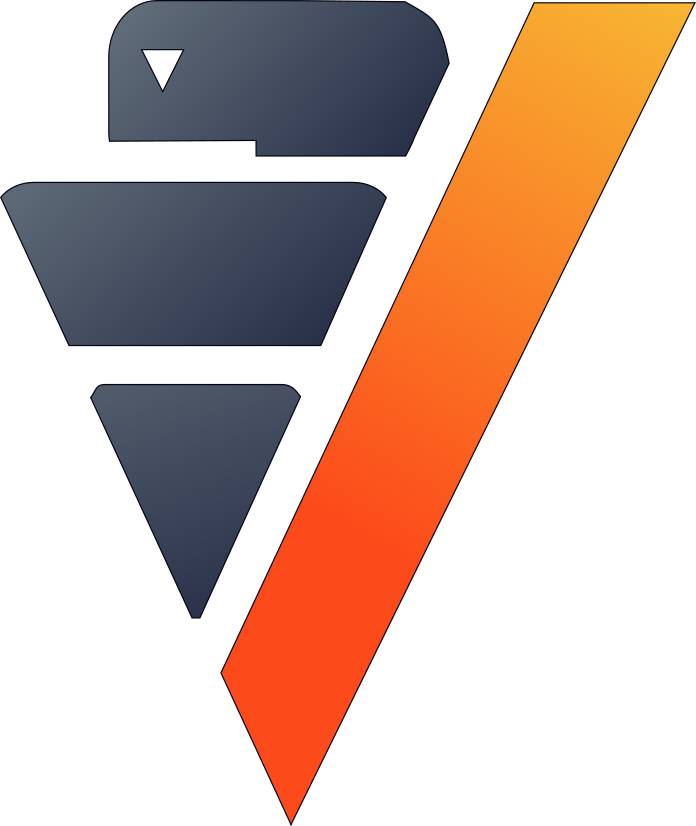

In [4]:
vdf = vDataFrame("heart")
display(vdf)

Let's use only the maximum heart rate achieved (thalach) and the serum cholestoral (chol) to identify some outliers.

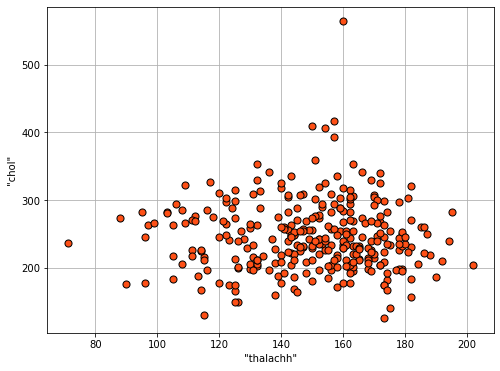

In [6]:
%matplotlib inline
vdf.scatter(["thalachh", "chol"])

We can see some outliers of the distributions. People having a high cholesterol and others having a very low heart rate. Let's compute the global outliers using the 'outliers' method.

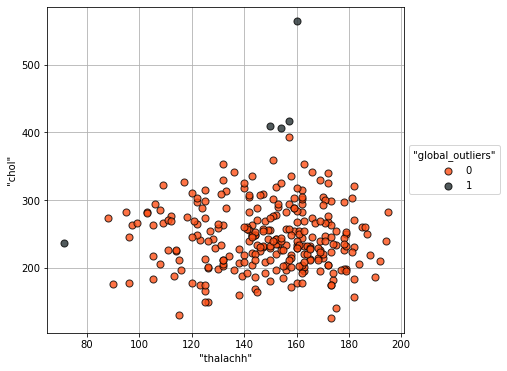

In [7]:
vdf.outliers(["thalachh", "chol"], "global_outliers")
vdf.scatter(["thalachh", "chol"], catcol = "global_outliers")

We detected some global outliers of the distribution. It is easy to impute them using the 'fill_outliers' method. Generally, Global Outliers are identified using the Z-Score. We consider that having a Z-Score greater than 3 means that the concerned data point is an outlier. Some less precise techniques consider the data points belonging to the first and last alpha-quantile are outliers. It is possible to pick up one of the two strategies when computing and filling outliers.

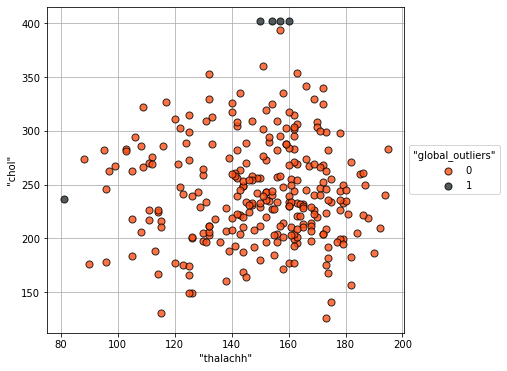

In [8]:
vdf["thalachh"].fill_outliers(use_threshold = True,
                             threshold = 3.0,
                             method = "winsorize")
vdf["chol"].fill_outliers(use_threshold = True,
                          threshold = 3.0,
                          method = "winsorize")
vdf.scatter(["thalachh", "chol"], catcol = "global_outliers")

Other techniques like DBSCAN or LOF (Local Outlier Factor) can be to use to detect other data points which can be possible outliers.

c:\users\psingh5\appdata\local\programs\python\python38-32\lib\site-packages\verticapy\utilities.py:1884: Warning: utilities.drop_table has been deprecated. It will be removed in v0.5.1. Use utilities.drop with parameter 'method' set to 'table' instead
  warnings.warn(
c:\users\psingh5\appdata\local\programs\python\python38-32\lib\site-packages\verticapy\utilities.py:258: Warning: The table 'dbscan_heart' doesn't exist or can not be dropped !
Use parameter: raise_error = True to get more information.
  warnings.warn(warning_message, Warning)
c:\users\psingh5\appdata\local\programs\python\python38-32\lib\site-packages\verticapy\toolbox.py:593: Warning: The VerticaPy schema doesn't exist or is incomplete. The model can not be stored.
Please use create_verticapy_schema function to set up the schema and the drop function to drop it if it is corrupted.
  warnings.warn(warning_message, Warning)


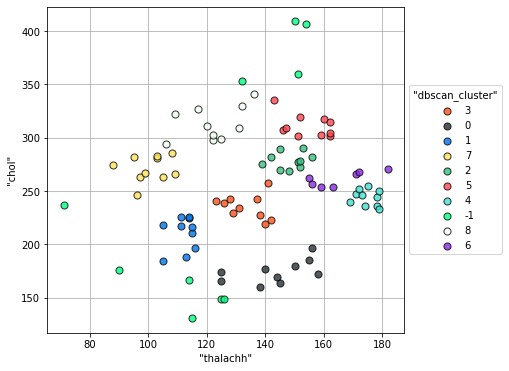

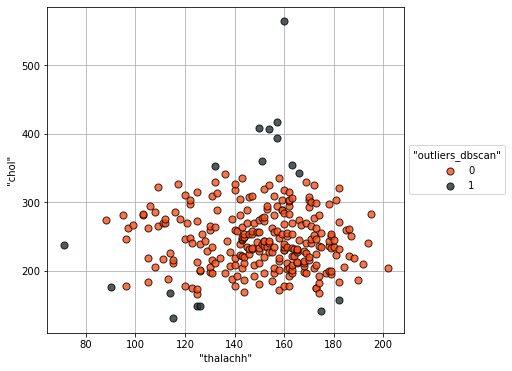

In [9]:
from verticapy.learn.cluster import DBSCAN

drop_table("dbscan_heart")
model = DBSCAN("dbscan_heart", eps = 20, min_samples = 10)
model.drop()
model.fit("heart", ["thalachh", "chol"])
model.plot()
vdf_tmp = model.predict()
vdf_tmp.eval(name = "outliers_dbscan",
             expr = "(dbscan_cluster = -1)::int")
vdf_tmp.scatter(["thalachh", "chol"], catcol = "outliers_dbscan")

DBSCAN will identify outliers during the clusters computation whereas LOF will compute an Outlier Score. We generally consider that a LOF Score greater than 1.5 means that the concerned data points are outliers.

c:\users\psingh5\appdata\local\programs\python\python38-32\lib\site-packages\verticapy\utilities.py:1884: Warning: utilities.drop_table has been deprecated. It will be removed in v0.5.1. Use utilities.drop with parameter 'method' set to 'table' instead
  warnings.warn(
c:\users\psingh5\appdata\local\programs\python\python38-32\lib\site-packages\verticapy\utilities.py:258: Warning: The table 'lof_heart' doesn't exist or can not be dropped !
Use parameter: raise_error = True to get more information.
  warnings.warn(warning_message, Warning)
c:\users\psingh5\appdata\local\programs\python\python38-32\lib\site-packages\verticapy\toolbox.py:593: Warning: The VerticaPy schema doesn't exist or is incomplete. The model can not be stored.
Please use create_verticapy_schema function to set up the schema and the drop function to drop it if it is corrupted.
  warnings.warn(warning_message, Warning)


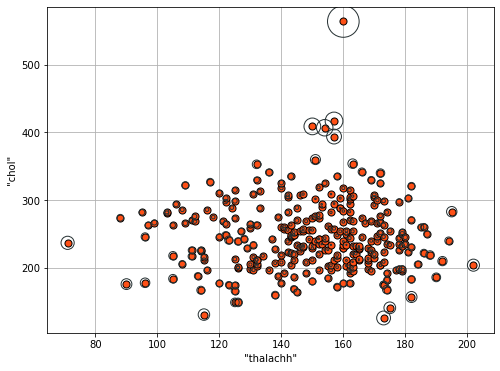

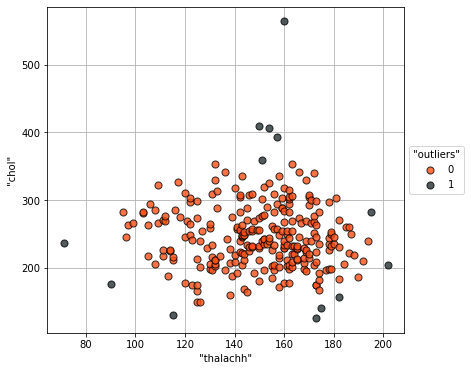

In [10]:
from verticapy.learn.neighbors import LocalOutlierFactor

drop_table("lof_heart")
model = LocalOutlierFactor("lof_heart")
model.drop()
model.fit("heart", ["thalachh", "chol"])
model.plot()
lof_heart = model.predict()
lof_heart.eval("outliers", "(CASE WHEN lof_score > 1.5 THEN 1 ELSE 0 END)")
lof_heart.scatter(["thalachh", "chol"], catcol = "outliers")

Other techniques like the KMeans clustering can help us to find other outliers. However the most important method is finding the Global Outliers using the Z-Score. They are easy to find and they can bring us a lot of information on the data. When we took the decision on how handling outliers, we can use different techniques to impute the missing values. Out next lesson is focused on missing values imputation.